<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EA%B9%80%EB%AF%BC%EC%A7%80/%5BHW%5DHistogram_Equalization_2try_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Image Load

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
path = "/content/drive/My Drive/content/drive/My Drive/DIP"

img = os.path.join(path, "musical.jpg")
raw_img = cv2.imread(img, cv2.IMREAD_COLOR)

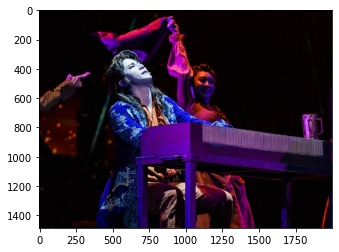

In [ ]:
#이미지 확인
plt.imshow(raw_img)

(1486, 2000, 3)

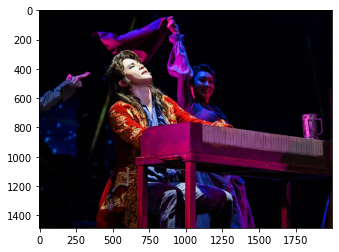

In [ ]:
#BGR -> RGB 변환하기
rgb_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

#이미지 크기 확인하기
raw_img.shape

## 1. Histogram Equalization

### (1) 채널 별로 histogram equalization 후 한 이미지로 합치기

In [ ]:
r, g, b = cv2.split(rgb_img)
R = cv2.equalizeHist(r)
G = cv2.equalizeHist(g)
B = cv2.equalizeHist(b)

ch_he_img = cv2.merge([R, G, B])

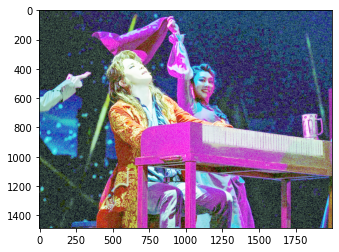

In [ ]:
plt.imshow(ch_he_img)

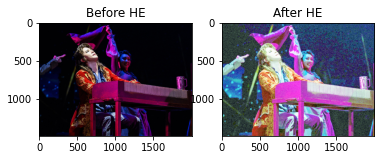

In [ ]:
# 두 사진 한 눈에 비교하가ㅣ

plt.subplot(1, 2, 1)
plt.title("Before HE")
plt.imshow(rgb_img)

plt.subplot(1, 2, 2)
plt.title("After HE")
plt.imshow(ch_he_img)

원본 이미지와 비교했을 때 뒤 앙상블 배우의 부분이 좀 더 밝아져서 더 잘보이지만 일부의 색상이 원본 이미지와 다른 것을 확인할 수 있다. (ex. 바지 색, 피아노 색) <br>
이 이미지는(보통의 컬러 영상은) 3개의 채널을 가지고 있으며 각각의 채널이 하나로 합쳐지면서 나타내고자 하는 색상을 표현하는데, 그러한 채널들을 따로 분리해서 equalization을 해주면 원래의 조합이 깨지면서 원하는 색과 다른 색이 나타나게 된다. <br>
**따라서 영상의 밝기 정보를 같이 고려하여 histogram equaliztion을 수행해주어야 한다.**

(개인적인 생각으로 각 채널 별로 따로 HE 해준 뒤 합쳐준 사진이 내 예상보다 멀끔히 나와서 놀랐다. 전체적으로 굉장히 어둡고, 비교적으로 다양한 색채가 나오는 사진이 아니여서 그런 것 같다.)

### (2) HSV Color space 이용

원본 이미지를 HSV color space로 변환한 뒤 채널 V를 Histogram Equalization 해준 뒤 병합해준다.

In [ ]:
hsv_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
V = cv2.equalizeHist(v)

hsv_he_img = cv2.merge([h, s, V])

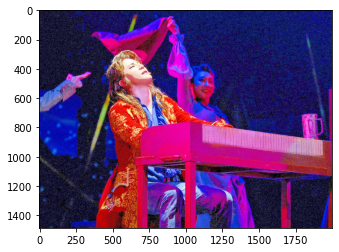

In [ ]:
#이미지 확인하기
hsv_he_img = cv2.cvtColor(hsv_he_img, cv2.COLOR_HSV2RGB)

plt.imshow(hsv_he_img)

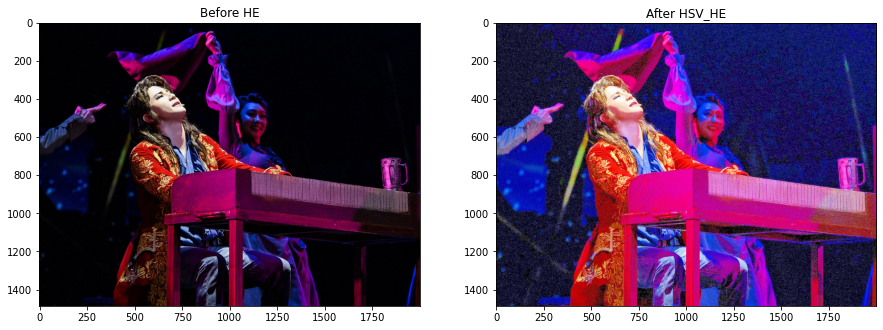

In [ ]:
# 두 사진 한 눈에 비교하기

plt.figure(figsize=(15, 15)) #아까 사진이 너무 작게 나왔어서 크기를 지정해줌

plt.subplot(1, 2, 1)
plt.title("Before HE")
plt.imshow(rgb_img)

plt.subplot(1, 2, 2)
plt.title("After HSV_HE")
plt.imshow(hsv_he_img)

### (3) YCrCb Color space 이용

원본 이미지를 YCrCb color space로 변환한 뒤 채널 Y를 Histogram Equalization 해준 뒤 병합해준다. <br>
(이전 **HSV color space의 V는 명도값**을 담당하고, **YCrCb color space의 Y는 휘도값(빛의 양)**을 담당한다. 다시 말해 둘 다 **'밝기 정보'를 평준화**해주는 것이다.

In [ ]:
YCrCb_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCrCb_img)
Y_HE = cv2.equalizeHist(Y)  #이전의 코드들도 _HE로 통일했으면 좀 더 깔끔했을듯

YCrCb_he_img = cv2.merge([Y_HE, Cr, Cb])

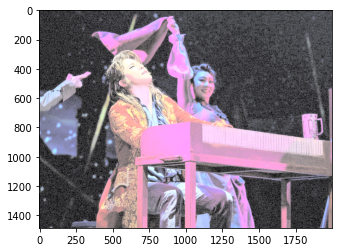

In [ ]:
#이미지 확인하기

YCrCb_he_img = cv2.cvtColor(YCrCb_he_img, cv2.COLOR_YCrCb2RGB)
plt.imshow(YCrCb_he_img)

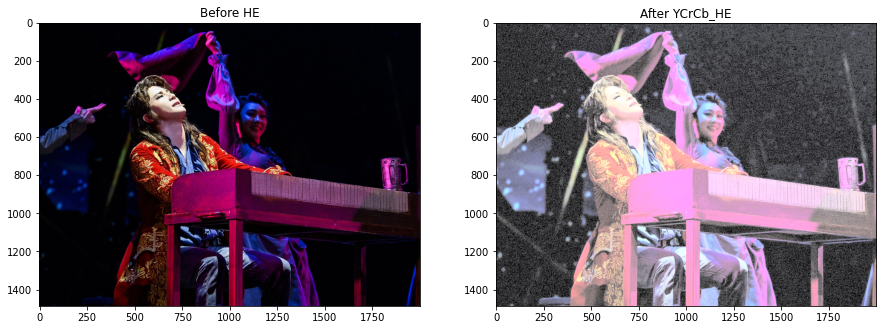

In [ ]:
# 두 사진 한 눈에 비교하기

plt.figure(figsize=(15, 15)) #아까 사진이 너무 작게 나왔어서 크기를 지정해줌

plt.subplot(1, 2, 1)
plt.title("Before HE")
plt.imshow(rgb_img)

plt.subplot(1, 2, 2)
plt.title("After YCrCb_HE")
plt.imshow(YCrCb_he_img)

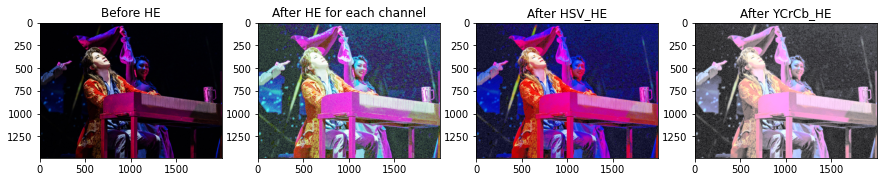

In [ ]:
# 4가지 사진 한 번에 확인하기

plt.figure(figsize=(15, 15))

plt.subplot(1, 4, 1)
plt.title("Before HE")
plt.imshow(rgb_img)

plt.subplot(1, 4, 2)
plt.title("After HE for each channel")
plt.imshow(ch_he_img)

plt.subplot(1, 4, 3)
plt.title("After HSV_HE")
plt.imshow(hsv_he_img)

plt.subplot(1, 4, 4)
plt.title("After YCrCb_HE")
plt.imshow(YCrCb_he_img)

결과물을 보면 오히려 보통 문제점이 많이 발생하는 첫번째 방법(각 채널 별로 따로 HE 수행 후 병합)이 제일 만족스럽게 된 것 같다.